## Exploratory Data Analysis. 

Due: Monday, December 24, 2018 23:59 hrs


---

## Introduction

This assignment will help you learn working with Pandas and then do the exploratory data analysis. I am using data from two resources [World bank](http://data.worldbank.org/) and  [Gapminder](http://www.gapminder.org).


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting
* [Seaborn](https://seaborn.pydata.org/), for plotting
* [Plotly](https://plot.ly/), for dynamic plotting


---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from io import BytesIO
import requests

# Problem 1

It is said that the CO2 emissions in the world has increased during the last decades. We are interested in doing a exploratory data analysis to find that if the emissions has increased in various regions like Africa/Latin America/Asia and Europe/NorthAmerica. From [World Bank](http://data.worldbank.org/), download the [CO2 emissions per capita](http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.PC?downloadformat=excel) as an excel file.

#### Problem 1(a)

First load the `metadata-countries` sheet from downloaded excel file into a pandas DataFrame and name this data set as `countries`.  This data set can be found [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [2]:
#your code here
xls= pd.ExcelFile('E:/Data Sciences/CO2.xls')
countries=xls.parse('Metadata - Countries')


Clean the countries dataframe to keep only the country and region data field.

In [3]:
#your code here
#Data= pd.read_excel('E:/Data Sciences/my data.xls', sheet_name="Data")
#countries.drop(countries.columns[[, 2]], axis=1, inplace=True)
#print(countries)
countries = countries.loc[:, ['TableName','Region']]
countries.columns=['Country Name','Region']


From Downloaded excel file, read `Data` datasheet in pandas DataFrame and name this data set as `emissions`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly. Be careful to read 'Data' sheet only.

In [4]:
#your code here
#emission=pd.read_excel('E:/Data Sciences/CO2.xls')
emissions=xls.parse('Data')

Transform the data set to have `years` as the rows and `countries` as the columns. Show the head of this data set when it is loaded. 

In [5]:
#your code here
emissions.drop(emissions.columns[[1,2,3]], axis=1, inplace=True)
#emissions.drop(emissions.index[1,2])
#emissions.head()
emissions.drop(emissions.index[:2],inplace=True)
#emissions.drop(emisisons.columns('Country Code'))
emissions=emissions.reset_index(drop=True)
emissions.columns=emissions.iloc[0]
emissions.drop(emissions.index[:1], inplace=True)
emissions=emissions.reset_index(drop=True)

            

In [6]:
emissions=emissions.T
emissions.columns=emissions.iloc[0]
emissions.drop(emissions.index[:1],inplace=True)
emissions.index.rename('Years',inplace=True)
emissions.head()


Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Years,,,,,,,,,,,,,,,,,,,,,
1960.0,NaN,0.0460599,0.0974716,1.25819,NaN,0.643689,0.118758,2.36747,NaN,NaN,...,NaN,0.229309,NaN,3.09901,0.135007,NaN,0.702611,5.61009,NaN,NaN
1961.0,NaN,0.0536043,0.0790381,1.37419,NaN,0.685151,0.108837,2.44262,NaN,NaN,...,NaN,0.237229,NaN,3.06973,0.163532,NaN,0.506779,5.70369,NaN,NaN
1962.0,NaN,0.0737648,0.201289,1.43996,NaN,0.760855,0.163018,2.52239,NaN,NaN,...,NaN,0.269494,0.594871,3.14051,0.15835,NaN,0.726302,5.74772,NaN,NaN
1963.0,NaN,0.0742327,0.192535,1.18168,NaN,0.874941,0.175223,2.31636,NaN,NaN,...,NaN,0.255299,0.471714,3.2445,0.184023,NaN,0.535971,5.81116,NaN,NaN
1964.0,NaN,0.0862925,0.201003,1.11174,NaN,0.999098,0.132355,2.53838,NaN,NaN,...,NaN,0.320829,0.864247,3.3606,0.208092,NaN,0.655561,6.16381,0.949422,1.04775


#### Problem 1(b)

Plot a histogram to show the distribution of `emissions per capita` across all countries in the world for any given year (e.g. 2010). Try different bin sizes to see if there exits any distribution.

In [7]:
def setEmissionYear(year):
    emission_year= pd.DataFrame(emissions.loc[year]) #select a specific year to find the emissions of all countries
    emission_year.columns=['CO2 emissions'] #column header is assigned
    emission_year= emission_year.reset_index(drop=False) #reset index
    return emission_year

In [8]:
year=2010.0

emissionYear= setEmissionYear(year)
emissionYear

,Country Name,CO2 emissions
0,Aruba,24.6705
1,Afghanistan,0.293837
2,Angola,1.24341
3,Albania,1.57857
4,Andorra,6.12259
5,Arab World,4.61576
6,United Arab Emirates,19.4437
7,Argentina,4.5585
8,Armenia,1.46562
9,American Samoa,NaN


#### Problem 1(c)

Next, we want to merge the data from two dataframes  `countries` and `emissions` for any given year. Write a function that does this.

In [9]:
year = 2010.0
#Select a year in which you want to find the emissions of all countries 
emissionYear = pd.DataFrame(emissions.loc[year])

#Assign column header
emissionYear.columns = ["CO2 emessions"]
    
#Reset index
emissionYear = emissionYear.reset_index(drop=False)

In [10]:
emissionYear.head()

,Country Name,CO2 emessions
0,Aruba,24.6705
1,Afghanistan,0.293837
2,Angola,1.24341
3,Albania,1.57857
4,Andorra,6.12259


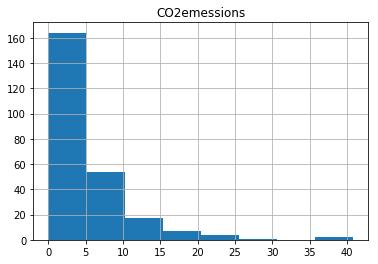

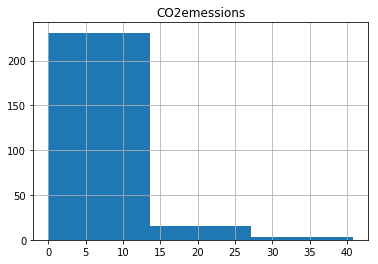

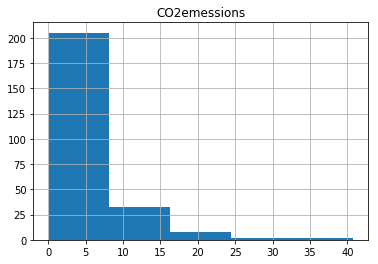

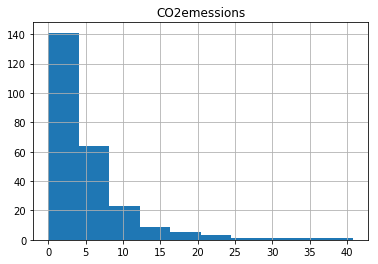

In [11]:
#your code here
#Separate the columns of emissionYear in index and values
idx = emissionYear.loc[:,'Country Name']
CO2emessions = emissionYear.loc[:,'CO2 emessions']

#Make a list of values
list=[]
for x in range(len(CO2emessions)):
    list = list + [CO2emessions[x]]

df = pd.DataFrame({'CO2emessions':list}, index = idx)

#Make histogram with different bins
hist1 = df.hist(bins=8)
hist2 = df.hist(bins=3)
hist3 = df.hist(bins=5)
hist4 = df.hist(bins=10)

In [12]:
"""
Function
--------
mergeByYear

Returns a merged DataFrame containing the country name,  region and CO2 emissions, 
for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'CO2 emissions'. 

Example
-------
>>> mergeByYear(2012)
"""
#your code here
# Merge auto and oil: merged
#merged = emissions.merge_asof(Country Name, Indicator Name, left_on='yr', right_on='Date'

# Print the tail of merged
#print(merged.tail())
def mergeByYear(year):
    #year.columns=['CO2 emissions']   #column header
    #year=year.reset_index(drop=False)#reset index
    res=pd.merge(year, countries, on="Country Name") #merge counttries and year dataframes at the basis of country name col
    return res


In [13]:
result1 = mergeByYear(emissionYear)

result1.head()

,Country Name,CO2 emessions,Region
0,Aruba,24.6705,Latin America & Caribbean
1,Afghanistan,0.293837,South Asia
2,Angola,1.24341,Sub-Saharan Africa
3,Albania,1.57857,Europe & Central Asia
4,Andorra,6.12259,Europe & Central Asia


#### Problem 1(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the CO2 emissions per person by region data set from 1(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years like for decade use 10 as a step.  

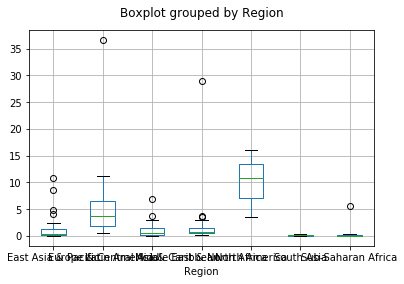

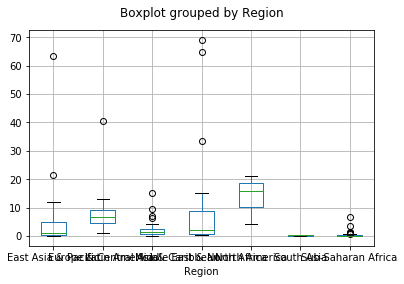

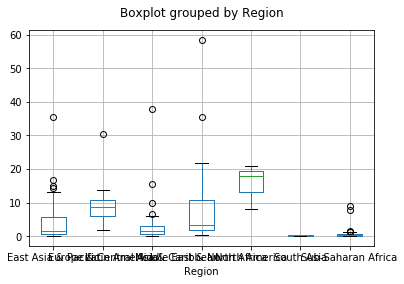

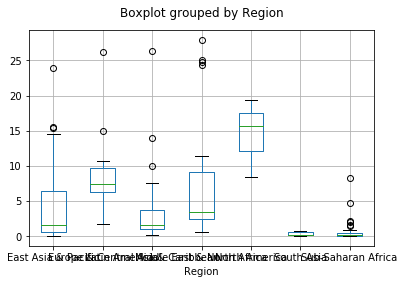

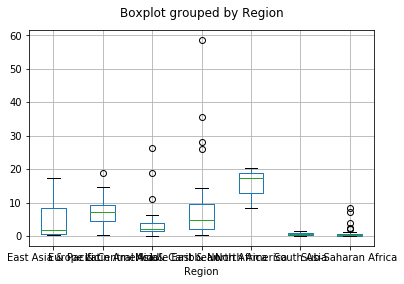

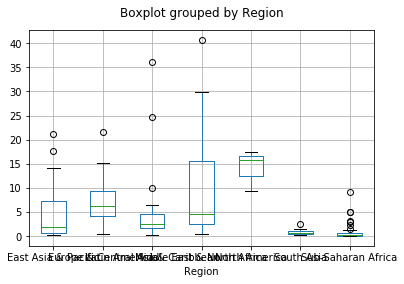

In [14]:
#your code here
for i in emissions.index[::10]:
    year = i
    
    #Call setEmissionYear function
    emissionYear= setEmissionYear(year)
    
    #Call merge function
    result = mergeByYear(emissionYear)
    
    #Make boxplot for a given year
    result.boxplot(column = 'CO2 emissions', by = 'Region');
    plt.title('')

#### Problem 1(e) 

Read the [Income per person](https://docs.google.com/spreadsheets/d/1PybxH399kK6OjJI4T2M33UsLqgutwj3SuYbk7Yt6sxE/pub?gid=0) data in `income' dataframe.

In [15]:
#your code here
url=requests.get("https://docs.google.com/spreadsheets/d/1PybxH399kK6OjJI4T2M33UsLqgutwj3SuYbk7Yt6sxE/pub?gid=0") #read url

content=url.content #get the content of webpage.....it is in the form of html

Life_exp=pd.read_html(BytesIO(content),index_col=0)[0]  #get the table data and makes a pandas dataframe


Read the [Life expectancy](https://docs.google.com/spreadsheets/d/1H3nzTwbn8z4lJ5gJ_WfDgCeGEXK3PVGcNjQ_U5og8eo/pub?gid=0) data in 'Life_exp' dataframe.

In [16]:
#your code here
Life_exp.columns=Life_exp.iloc[0]   #rename the columns of dataset by 1st row
Life_exp.drop(Life_exp.index[:1],inplace=True) #remove 1st row because we already rename the column  headers with this row
Life_exp = Life_exp.reset_index(drop=True)  #Reset indexes
Life_exp.head()

1.0,GDP per capita,nan,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
3,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,NaN,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0


Write a function similar to written in 1(c), that merges income and Life_exp dataframes, such that if you pass a year as argument, it returns

Country, Regions, CO2 emissions, income per capita, life expectency

In [17]:
#your code here
Life_exp = Life_exp.T #country name to column and year to row

Life_exp.columns = Life_exp.iloc[0] #Rename the columns of dataset by 1st row

Life_exp.drop(Life_exp.index[:1], inplace=True) #Remove the 1st row because we already rename the column headers with this row

Life_exp.index.rename('Years', inplace=True) #Rename column header years

Life_exp.head()

GDP per capita,nan,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Ã land,South Sudan,nan,nan
Years,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1800.0,NaN,NaN,603,NaN,667,716,NaN,1197,618,NaN,...,NaN,NaN,877,NaN,663,869,NaN,507,NaN,NaN
1801.0,NaN,NaN,603,NaN,667,716,NaN,1199,620,NaN,...,NaN,NaN,879,NaN,665,870,NaN,507,NaN,NaN
1802.0,NaN,NaN,603,NaN,668,717,NaN,1201,623,NaN,...,NaN,NaN,882,NaN,667,871,NaN,507,NaN,NaN
1803.0,NaN,NaN,603,NaN,668,718,NaN,1204,626,NaN,...,NaN,NaN,884,NaN,668,872,NaN,507,NaN,NaN


In [18]:
url1 = requests.get('https://docs.google.com/spreadsheets/d/1PybxH399kK6OjJI4T2M33UsLqgutwj3SuYbk7Yt6sxE/pub?gid=0=csv')
res1 = url1.content
income = pd.read_html(BytesIO(res1), index_col=0)[0]

In [19]:
income.columns = income.iloc[0]
income.drop(income.index[:1], inplace=True)

income = income.reset_index(drop=True)

income.head()

1.0,GDP per capita,nan,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
3,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,NaN,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0


In [20]:
income = income.T
income.columns = income.iloc[0]

income.drop(income.index[:1], inplace=True)
income.index.rename('Years', inplace=True)

income.head()

GDP per capita,nan,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Ã land,South Sudan,nan,nan
Years,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1800.0,NaN,NaN,603,NaN,667,716,NaN,1197,618,NaN,...,NaN,NaN,877,NaN,663,869,NaN,507,NaN,NaN
1801.0,NaN,NaN,603,NaN,667,716,NaN,1199,620,NaN,...,NaN,NaN,879,NaN,665,870,NaN,507,NaN,NaN
1802.0,NaN,NaN,603,NaN,668,717,NaN,1201,623,NaN,...,NaN,NaN,882,NaN,667,871,NaN,507,NaN,NaN
1803.0,NaN,NaN,603,NaN,668,718,NaN,1204,626,NaN,...,NaN,NaN,884,NaN,668,872,NaN,507,NaN,NaN


In [21]:
def mergeByYear1(Life_expYear, incomeYear, emissionYear):
    
    #Merge "countries" ,"Life_expYear", "incomeYear" and "emissionYear" dataframes at the basis of 'Country name' column
    url1 = pd.merge(Life_expYear, countries, on="Country Name")
    url2 = pd.merge(incomeYear, url1, on="Country Name")
    r3 = pd.merge(emissionYear, url2, on="Country Name")
    
    return r3

In [22]:
#For Life_exp Dataset
year=2010.0
#Select a year in which you want to find the Life expectancy of all countries 
Life_expYear = pd.DataFrame(Life_exp.loc[year])

#Rename column header
Life_expYear.index.rename("Country Name", inplace=True)

#Assign column header
Life_expYear.columns = ["Life expectancy"]
    
#Reset index
Life_expYear = Life_expYear.reset_index(drop=False)


In [23]:
#For income Dataset
#Select a year in which you want to find the GDP per capital of all countries 
incomeYear = pd.DataFrame(income.loc[year])

#Rename column header
incomeYear.index.rename("Country Name", inplace=True)

#Assign column header
incomeYear.columns = ["GDP per capital"]
    
#Reset index
incomeYear = incomeYear.reset_index(drop=False)

In [24]:
#Call function
result = mergeByYear1(Life_expYear, incomeYear, emissionYear)

result.head()

,Country Name,CO2 emissions,GDP per capital,Life expectancy,Region
0,Aruba,24.6705,33288,33288,Latin America & Caribbean
1,Afghanistan,0.293837,1637,1637,South Asia
2,Angola,1.24341,7047,7047,Sub-Saharan Africa
3,Albania,1.57857,9374,9374,Europe & Central Asia
4,Andorra,6.12259,38982,38982,Europe & Central Asia


Make a plot by getting data from the above function similar to given as below

<img src="CO2-emissions-tons-per-person.PNG" />

where each circle shows a country and size of the circle shows its CO2 emissions. You may use `matplotlib, seaborn or plotly` for this purpose

In [25]:
#your code here

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


In [26]:
#first we load the all data that is required sheet in pd from excelfile after that we made some changes accordind to given requiremnets in these 
#after that we make plots and shows data in graphical form by using plotlib from matplotlib 